In [39]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [64]:
VERSION = 2
MAKESUBMISSION = True

In [54]:
X_test = pd.read_csv('data/test.csv')
print(f'{X_test.shape[0]} test digits.')
X_test = X_test.dropna()
print(f'{X_test.shape[0]} valid test digits.')
X_test = np.reshape(X_test.values, (X_test.shape[0], 28, 28))

data_train = pd.read_csv('data/train.csv')
print(f'{data_train.shape[0]} train digits.')
data_train = data_train.dropna()
print(f'{data_train.shape[0]} valid train digits.')
X = data_train.drop(columns=['label'])
X = np.reshape(X.values, (X.shape[0], 28, 28))
y = pd.get_dummies(data_train['label'])


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

28000 test digits.
28000 valid test digits.
42000 train digits.
42000 valid train digits.


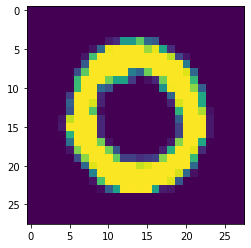

In [42]:
plt.imshow(X[1])
plt.show()

In [61]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
model.save(f'assets/model_{VERSION}')

Epoch 1/200


2022-05-21 13:29:21.848405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1050/1050 [==============================] - ETA: 0s - loss: 0.4266 - accuracy: 0.9312

2022-05-21 13:29:36.505639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1050/1050 [==============================] - 17s 14ms/step - loss: 0.4266 - accuracy: 0.9312 - val_loss: 0.0981 - val_accuracy: 0.9706
Epoch 2/200
1050/1050 [==============================] - 14s 14ms/step - loss: 0.0714 - accuracy: 0.9783 - val_loss: 0.0570 - val_accuracy: 0.9825
Epoch 3/200
1050/1050 [==============================] - 14s 14ms/step - loss: 0.0486 - accuracy: 0.9854 - val_loss: 0.0599 - val_accuracy: 0.9808
Epoch 4/200
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0471 - accuracy: 0.9853 - val_loss: 0.0489 - val_accuracy: 0.9863
Epoch 5/200
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0383 - accuracy: 0.9884 - val_loss: 0.0529 - val_accuracy: 0.9831
Epoch 6/200
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0316 - accuracy: 0.9896 - val_loss: 0.0486 - val_accuracy: 0.9856
Epoch 7/200
1050/1050 [==============================] - 14s 14ms/step - loss: 0.0356 - accuracy: 0.9893 - val_loss: 0.0537 - val_

In [63]:
y_test = model.predict(X_test)
y_test = np.round(y_test)
y_test = pd.DataFrame(y_test)
y_test = y_test.idxmax(axis=1)

if MAKESUBMISSION:
    submission = pd.DataFrame(columns=['ImageId', 'Label'])
    submission['ImageId'] = np.arange(1,28001)
    submission['Label'] = y_test
    submission.to_csv(f'submission_{VERSION}.csv', index=False)

2022-05-21 13:38:59.526837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
